In [1]:
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
import geopandas as gpd


from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds as qs
qs.themes.mpl_style();

#importing 


In [2]:
import warnings
warnings.filterwarnings("ignore")



In [3]:
df_2020 = pd.read_csv("C:\\Users\\yinzh\\Desktop\\ECO225\\Project\\Data\\trump_biden_polls.csv")
df_2016 = pd.read_csv("C:\\Users\\yinzh\\Desktop\\ECO225\\Project\\Data\\trump_clinton_polls.csv")
df_county = pd.read_csv("C:\\Users\\yinzh\\Desktop\\ECO225\\Project\\Data\\county_statistics.csv")
#reading data and transforming into dataframes


## Introduction
A project by Yinzhou Liu. 

The US Election is one of if not the most important political activity in the West, the outcome of this election determines not only the fate of US citizens, but the entire political environment of this world. Various factors play a role in determining the outcomes of this event, and by analyzing and summarizing the factors, it provides us with the potential of forecasting future elections, and predict patterns in  voting. In this project, I will be using the dataset "Election, Covid and Demographic", compiled by Ethan Schacht.

This dataset focuses around election results of both 2016 and 2020, demographic data such as income/race/ of each individual county is also provided. The main file I'm using is "county_statistics.csv", it initially has 51 columns, containing data such as percentage vote for Trump/Biden, total votes, data that indicates election results in terms of different counties. The rest columns are mostly demographic data.

**The question I'm trying to answer is “Did covid-19 situations and demographics* influence the 2020 election results?"**
The independent variables I'm using in this project are Income per capital "IncomePerCap", and percentage of population being white, both depicting demographics; covid case rates and covid death rates, both depicting the covid-19 situation. As we can see from the heatmap located at the end of section 1, these factors all possess moderate to strong correlation to the percentage votes of the two candidates,indicator of the outcome. Thus I've chosen these independent variables. 
The dependent variable, is the result of this election, I'm using average percentage voted for each candidate of each county/state(depending on situation)as a rough indicator of the results.




Datasources: https://www.kaggle.com/muonneutrino/us-census-demographic-data
             , https://www.kaggle.com/etsc9287/2020-general-election-polls  (Ethan Schacht)
             (No other links is provided by author Ethan Schacht)
....


# Section 1

In [4]:
df1_county = df_county.drop(["Walk","OtherTransp","WorkAtHome","MeanCommute","Drive","Carpool"], axis = 1)
dfc = df1_county.dropna(axis = 0)
#cleaning data, removing lat&long for now as no geospatial analysis is of interest YET.
#Also dropping NAN values, dropped certain small counties, as some certain counties names varies by years and is 
#inconsistent

dfc[["percentage20_Donald_Trump","percentage20_Joe_Biden","IncomePerCap","cases","deaths","Poverty","White"]].describe()
#countymainland[["IncomePerCap","deathpct","covidpct","White"]].describe()
#returns basic statistical characteristics of this dataset(in terms of counties).

percentage20_Donald_Trump  percentage20_Joe_Biden  IncomePerCap  \
count                3046.000000             3046.000000   3046.000000   
mean                    0.656537                0.326225  25914.910703   
std                     0.156261                0.155071   6115.954824   
min                     0.040000                0.031000  10960.000000   
25%                     0.568000                0.208000  21782.000000   
50%                     0.688000                0.295500  25211.000000   
75%                     0.776000                0.415750  28940.750000   
max                     0.962000                0.940000  69529.000000   

               cases       deaths      Poverty        White  
count    3046.000000  3046.000000  3046.000000  3046.000000  
mean     2902.460604    72.733093    15.991399    77.221011  
std     10817.512225   342.061979     6.498167    19.728191  
min         0.000000     0.000000     2.400000     0.600000  
25%       241.250000     3.000000    11.400000    65.700000  
50%       654.500000    11.000000    15.200000    84.500000  
75%      1794.750000    36.000000    19.300000    93.000000  
max    309190.000000  7404.000000    52.000000   100.000000

Summary statistics of all the counties are shown above, mean poverty rate is around 16%, mean income per capital is around 26000 USD and cases varies a lot as we can see from the 10000 standard deviation. The quartiles' value will be used in section 2 graphs as rulers.


Text(0.5, 0, 'Poverty Rates')

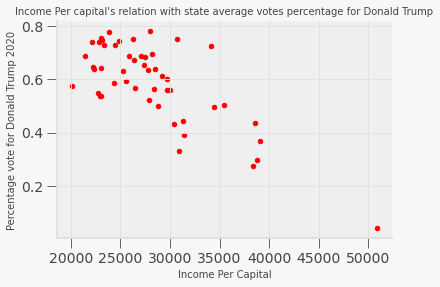

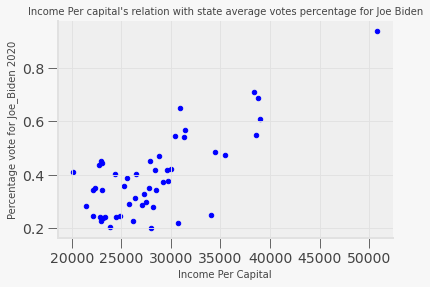

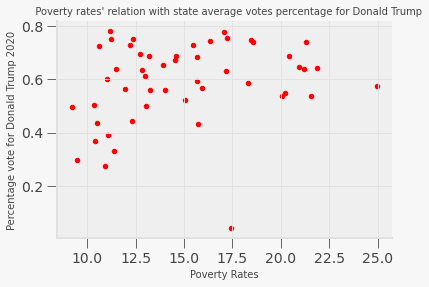

In [5]:

#merges a new dataframe with 3000+ counties merged into states, with their each respective mean     
    

#plotting percentage of votes varying by average incomepercap, for each counties
dcbystate = dfc.groupby("state")["IncomePerCap", "percentage20_Donald_Trump","percentage20_Joe_Biden","Poverty"].mean()

dcbystate.plot(kind= "scatter",  x="IncomePerCap",y="percentage20_Donald_Trump", color= "r")
plt.title("Income Per capital's relation with state average votes percentage for Donald Trump",size = 10)
plt.ylabel("Percentage vote for Donald Trump 2020", size = 10)
plt.xlabel("Income Per Capital",size = 10)

dcbystate.plot(kind= "scatter",  x="IncomePerCap",y="percentage20_Joe_Biden", color= "b")
plt.title("Income Per capital's relation with state average votes percentage for Joe Biden",size = 10)
plt.ylabel("Percentage vote for Joe_Biden 2020", size = 10)
plt.xlabel("Income Per Capital", size = 10)

dcbystate.plot(kind="scatter", x="Poverty", y="percentage20_Donald_Trump", color= "r")
plt.title("   Poverty rates' relation with state average votes percentage for Donald Trump", size = 10)
plt.ylabel("Percentage vote for Donald Trump 2020", size = 10)
plt.xlabel("Poverty Rates", size = 10)


#only graphing out Trump's relation to variables since Biden and Trump's graph are symmetrical


Graphs of Trump and Biden are rough mirrors of each other, thus I've only displayed one for simplicity.
This scatter plot depicts the relation between a states average income and their voting decision.
There is a pretty apparent trend, upper graph shows that as average income *increases*, a state is *less likely* to favour **Donald Trump**(in percentage voted), but the lower graph shows that as average income *increases*, that state favours **Biden** more. An apparent difference in candidate preference based on income is displayed here.

Text(0.5, 0, 'Income Per Capital')

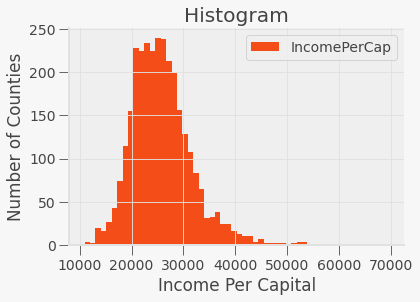

In [6]:
#histogram of distribution of income per capital of counties.

fig, ax = plt.subplots()
dfc.plot(
    kind="hist", y="IncomePerCap", color=(244/255, 77/255, 24/255),
    bins= 56, legend=True, density=False, ax=ax
)
plt.title("Histogram")
plt.ylabel("Number of Counties")
plt.xlabel("Income Per Capital")

A right-skewed histogram, depicting distribution of different income per capital levels and their corresponding number of counties, with majority of income data clustered around 25000~, and a small but still significant amount of counties with 25000+ income.

In [7]:
covstatesum = dfc.groupby("state")["cases", "TotalPop","deaths"].mean()
covstatesum["covidpct"] = covstatesum["cases"]/covstatesum["TotalPop"]*100
covstatesum["deathpct"] = covstatesum["deaths"]/covstatesum["cases"]*100
resultsum = dfc.groupby("state")["IncomePerCap", "percentage20_Donald_Trump","percentage20_Joe_Biden","Poverty","White"].mean()
resultsum2 = dfc.groupby("state")["total_votes20","votes20_Donald_Trump","votes20_Joe_Biden",'votes16_Donald_Trump',
                                  'votes16_Hillary_Clinton',"total_votes16"].sum()
resultsum = pd.concat([resultsum,resultsum2], axis = 1)
covfinal = pd.concat([covstatesum,resultsum], axis = 1)#.drop(["Poverty","IncomePerCap"], axis = 1)
#creating new dataframe for covid analysis
covfinal['percentage20_Donald_Trump'] = covfinal['votes20_Donald_Trump']/covfinal['total_votes20']
covfinal['percentage20_Joe_Biden'] = covfinal['votes20_Joe_Biden']/covfinal['total_votes20']
covfinal['percentage16_Donald_Trump'] = covfinal['votes16_Donald_Trump']/covfinal['total_votes16']
covfinal['percentage16_Hillary_Clinton'] = covfinal['votes16_Hillary_Clinton']/covfinal['total_votes16']
#describe function displays some standard statistics(in terms of states, thus the difference from the previous describe())


Text(0.5, 0, 'state covid case rates ')

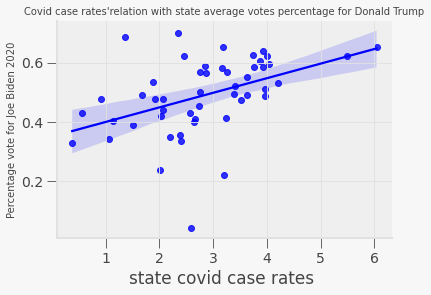

In [8]:

#plotting covid case rate with votes percentage
#Plot with linear regression
#covfinal.plot(kind="scatter", x="covidpct", y="percentage20_Joe_Biden", color= "b")

sns.regplot(data= covfinal, x = "covidpct", y= "percentage20_Donald_Trump", color = "b")
plt.title("Covid case rates'relation with state average votes percentage for Donald Trump", size = 10)
plt.ylabel("Percentage vote for Joe Biden 2020", size = 10)
plt.xlabel("state covid case rates ")


Text(0.5, 0, 'Percentage of population being white')

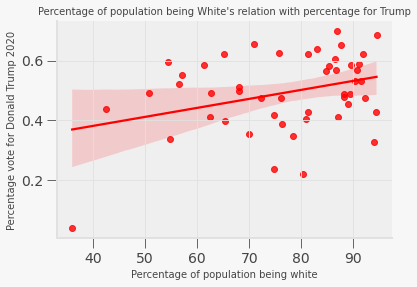

In [9]:
state_gdf = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
state1 = state_gdf.merge(covfinal, left_on = "STUSPS", right_on = "state", how = "outer" )
state1.dropna(axis = 0 )

not_mainland = ['Alaska', 'Hawaii', "Puerto Rico","American Samoa","Guam","Commonwealth of the Northern Mariana Islands"]

state1mainland = state1.query('NAME not in @not_mainland')

plt.title("Covid death rates'relation with state average votes percentage for Donald Trump",size = 10)
plt.ylabel("Percentage vote for Donald Trump 2020", size = 10)
plt.xlabel("state covid death rates ")

sns.regplot(data= state1mainland, x = "White", y= "percentage20_Donald_Trump", color = "r")
plt.title("Percentage of population being White's relation with percentage for Trump",size = 10)
plt.ylabel("Percentage vote for Donald Trump 2020", size = 10)
plt.xlabel("Percentage of population being white",size = 10)

Text(0.5, 0, 'Covid Death Rates')

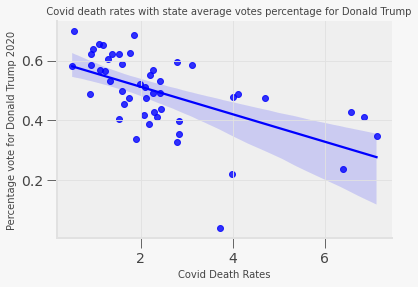

In [10]:
sns.regplot(data= state1mainland, x="deathpct", y="percentage20_Donald_Trump", color= "b")
plt.title("   Covid death rates with state average votes percentage for Donald Trump", size = 10)
plt.ylabel("Percentage vote for Donald Trump 2020", size = 10)
plt.xlabel("Covid Death Rates", size = 10)

Surprisingly, states who had more covid cases in proportion to their entire population, had a higher average voting percentage for Donald Trump, while the opposite can be said for Joe Biden, covid case rates is certainly correlated with election results. Linear regression shows upward sloping line for Joe biden, depicting higher percentages in case rates correlates with a lower percentage in votes for Biden, the opposite can be said for Trump.
Covid death rates also shows correlation, but not strong.

Also, states with higher percentage of white population tends to vote more for Trump, but only by a small amount.

(Only speculations can be made, but from my economic courses could it be due to the very timely delivery of stimulus packages? Or could it be the other way around, where because this state has higher percentage support for Trump, thus having higher covid case rates?)

Graphs are a rough representations of the linear regressions, a more detailed version with data can be seen in section 

<AxesSubplot:title={'center':'Distribution of case rates'}, xlabel='Case rates', ylabel='Number of States'>

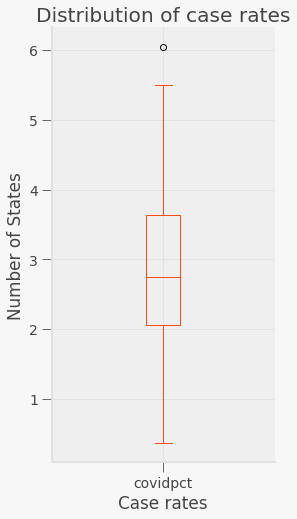

In [11]:
fig, gax = plt.subplots(figsize=(4,8))
#covfinal.plot(
#    kind="hist", y="covidpct", color=(244/255, 77/255, 24/255),
#    bins= [0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3.0,3.2
#           ,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5,5.2,5.4,5.6,5.8,6.0,6.2], legend=False, density=False, ax=gax[0]
#)
plt.title("Distribution of case rates")
plt.ylabel("Number of States")
plt.xlabel("Case rates")

covfinal.plot(
    kind="box", y="covidpct", color=(244/255, 77/255, 24/255),
     legend=False, ax=gax
)


A boxplot depicting distribution of the covid case rates, most states have a rate of around two to four percent of
population being infected with a mean infection rate of almost 3%.

Note that boxplot is used instead of histogram because infection rates are floats that varies by states and hardly ever is the same as eachother thus can't be drawn in a histogram.

In [12]:
dfc['covidpct']=dfc['cases']/dfc['TotalPop']*100
dfc['deathpct']=dfc['deaths']/dfc['cases']*100
heatdfc = dfc[['IncomePerCap','White','covidpct','deathpct','percentage20_Donald_Trump',"percentage20_Joe_Biden"]]
# a more specific way of calculating covid-19 situations, used for correlation matters.

<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

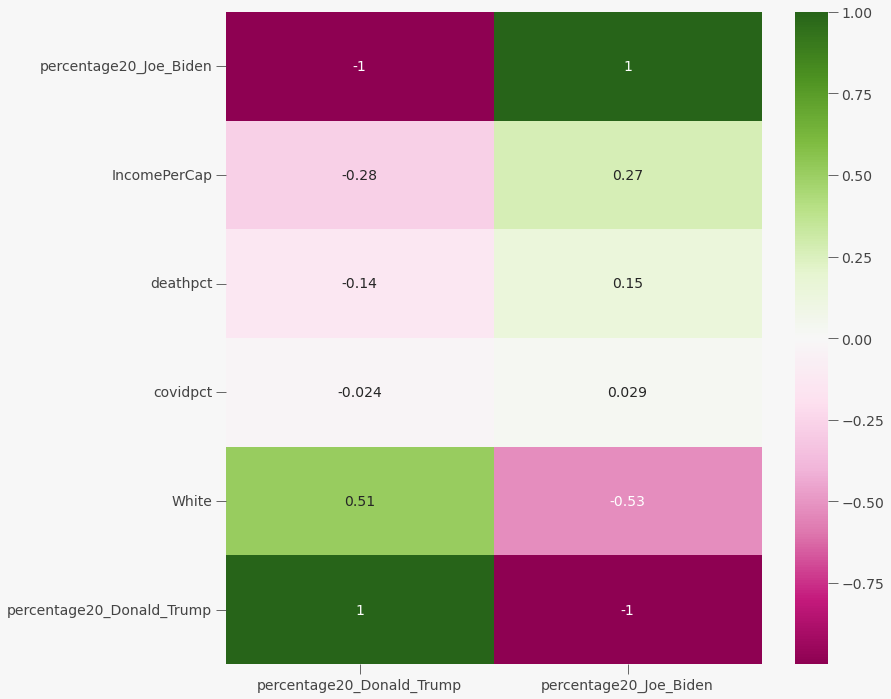

In [13]:

plt.figure(figsize = (12,8))

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(heatdfc.corr()[['percentage20_Donald_Trump',"percentage20_Joe_Biden"]].sort_values("percentage20_Joe_Biden", ascending = False), cmap='PiYG', annot=True, ax=ax)
#heat map displaying correlations

Income per capital has a correlation of 0.28 and -0.27 with our two dependent variable (indicator of election result), and so does covid death rates with -0.28 and 0.27, both showing moderate correlations. Racial factors such as percentage of population being white has the highest correlation of 0.51 and -0.53, while covid infection rates only show a weak to no significance correlation of -0.024 and 0.029.
Such correlations will be used to aid the linear regressions used in section 4.



# Section 2 

# Main Message So Far 
Demographic factors and covid situations presents correlation with election outcomes, although one can't be sure there exists causation relations exists between variables, we can still use these variables to analyze and potentially forecast election results.

In [14]:
#Geospatial stuff
dfc['covidpct']=dfc['cases']/dfc['TotalPop']*100
dfc['deathpct']=dfc['deaths']/dfc['cases']*100
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
dfcgeo = dfc[["county", "state", "percentage20_Donald_Trump","percentage20_Joe_Biden","lat","long","White",
              "Asian","Black","IncomePerCap","covidpct","Poverty","deathpct"]]
dfcgeo["coord"] = list(zip(dfcgeo.long, dfcgeo.lat))
dfcgeo["coord"] = dfcgeo["coord"].apply(Point)


gd_c = gpd.GeoDataFrame(dfcgeo, geometry = 'coord')


We here analyze the previous factors' influence on the outcome of the election in two of the major swing states, Arizona and Florida(based on https://ballotpedia.org/Presidential_battleground_states,_2020).


In [15]:


county_gdf = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
state_gdf = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
#04 is arizona, 2020 election swing state 
county_df = county_gdf.query("STATEFP == '04'")


county_df2 = county_gdf.query("STATEFP == '12'")
#12 is florida, 2020 election swing state


#importing data

In [16]:

swingstates = ['04','08','12','13','19',"23","37","39",'42','48','55']
#2020 election swing states including Arizona,Colorado,Florida,Georgia,Iowa,Maine,Michigan,
#North Carolina,Ohio,Pennsylvania,Texas,Wisconsin
countyswingstates = county_gdf.query('STATEFP in @swingstates')

state1 = state_gdf.merge(covfinal, left_on = "STUSPS", right_on = "state", how = "outer" )
state1.dropna(axis = 0 )

not_mainland = ['Alaska', 'Hawaii', "Puerto Rico","American Samoa","Guam","Commonwealth of the Northern Mariana Islands"]
mainlandgdf = state_gdf.query('NAME not in @not_mainland')
state1mainland = state1.query('NAME not in @not_mainland')

In [17]:
county_df["NAME"]=county_df["NAME"].str.title()
county_df["NAME"]=county_df["NAME"].str.strip()
dfcgeo["county"]=dfcgeo["county"].str.title()
dfcgeo["county"]=dfcgeo["county"].str.strip()


#cleaning data


In [18]:
geowithcountyAR = county_df.merge(dfcgeo, left_on = "NAME", right_on = "county", how = "inner")
geowithcountyAR.drop(["lat","long"], axis = 1)
geowithcountyFL = county_df2.merge(dfcgeo, left_on = "NAME", right_on = "county", how = "inner")
geowithcountyFL.drop(["lat","long"], axis = 1)
geowithcounty = county_gdf.merge(dfcgeo, left_on = "NAME", right_on = "county", how = "inner")
geowithcountyswing = countyswingstates.merge(dfcgeo, left_on = "NAME", right_on = "county", how = "inner")
not_mainland = ['02', '15', "72","60","66","69"]
countymainland = geowithcounty.query('STATEFP not in @not_mainland')
#merging dataframes into bigger frames, some on certain states, some on a nation scale
geowithcountyAR.describe()
#Quartile values of each variables from describe() would be used to plot graphs

ALAND        AWATER  percentage20_Donald_Trump  \
count  1.900000e+01  1.900000e+01                  19.000000   
mean   1.766468e+10  5.992192e+07                   0.570579   
std    1.126409e+10  8.791031e+07                   0.184855   
min    3.203613e+09  3.088046e+06                   0.185000   
25%    1.197275e+10  1.317132e+07                   0.439500   
50%    1.428127e+10  3.656799e+07                   0.582000   
75%    2.381029e+10  5.928162e+07                   0.702500   
max    4.822212e+10  3.873443e+08                   0.826000   

       percentage20_Joe_Biden        lat        long      White      Asian  \
count               19.000000  19.000000   19.000000  19.000000  19.000000   
mean                 0.413684  34.573600 -109.478843  56.426316   1.289474   
std                  0.184203   2.349670    7.644508  20.544879   1.199951   
min                  0.156000  31.525090 -122.006652  15.000000   0.000000   
25%                  0.284500  32.918463 -112.522837  49.400000   0.650000   
50%                  0.399000  33.801901 -110.847909  56.300000   0.900000   
75%                  0.545500  35.552244 -109.620424  69.250000   1.700000   
max                  0.791000  40.003468  -83.833693  88.800000   4.400000   

           Black  IncomePerCap   covidpct    Poverty   deathpct  
count  19.000000     19.000000  19.000000  19.000000  19.000000  
mean    1.726316  23585.263158   3.357058  19.115789   2.590926  
std     1.556650   5122.240762   1.782595   5.769485   1.186155  
min     0.200000  13865.000000   1.059419  11.500000   0.440529  
25%     0.500000  20041.000000   2.200584  15.100000   1.996781  
50%     1.000000  23527.000000   3.001946  18.600000   2.558239  
75%     2.600000  26443.500000   3.871831  21.200000   3.287982  
max     5.100000  36388.000000   6.850368  35.900000   5.254884

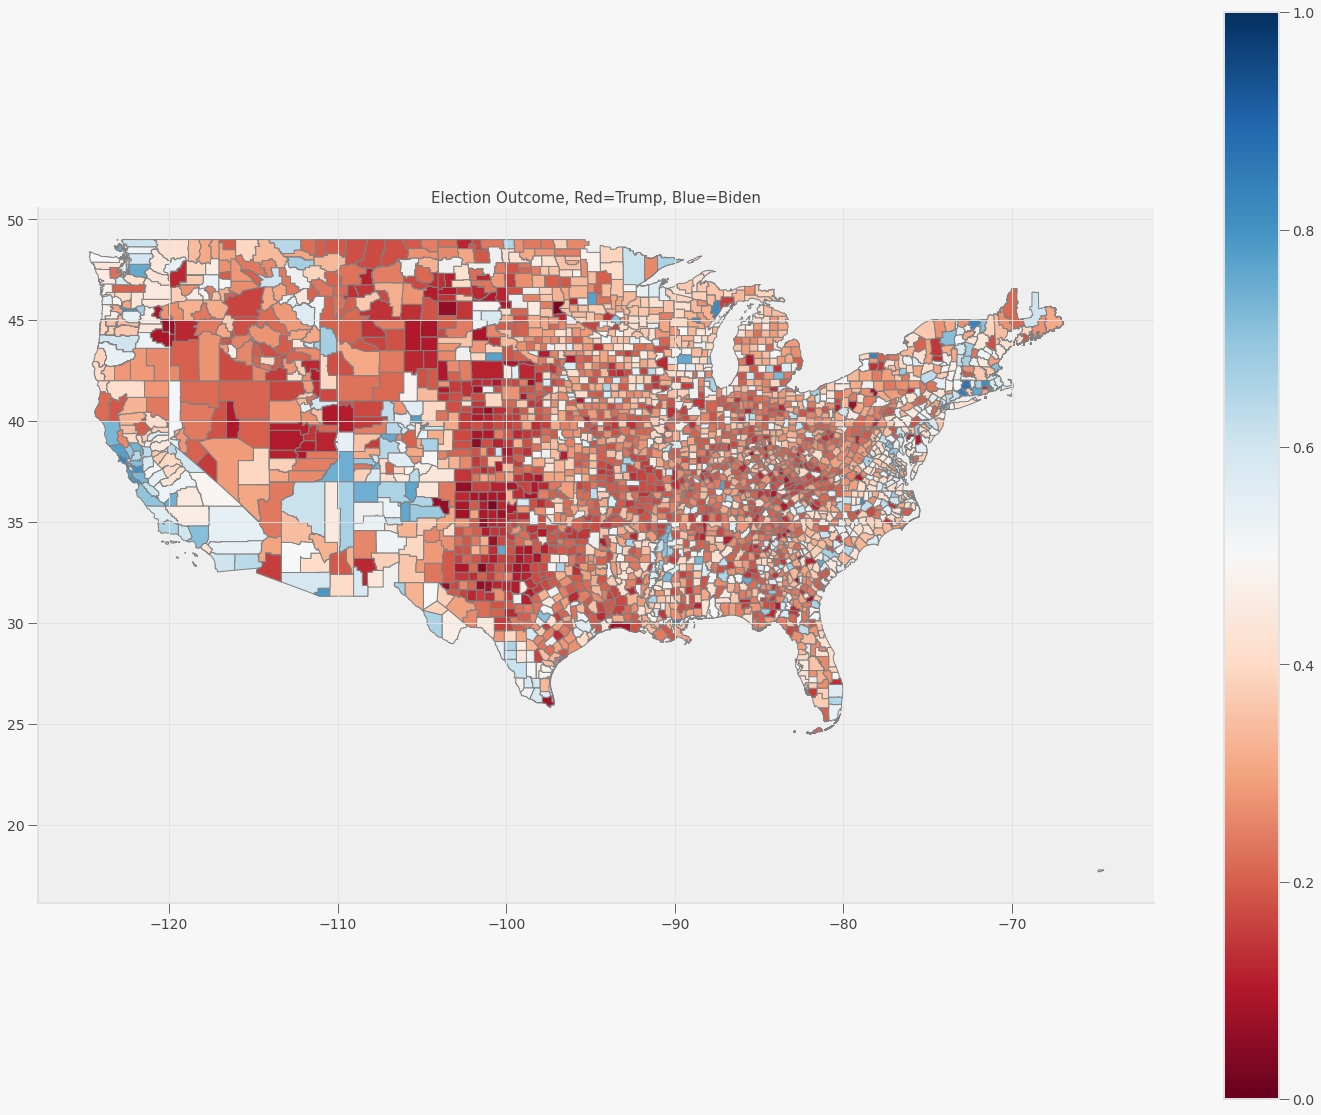

In [19]:

fig, gax = plt.subplots(figsize=(25,20))

#state_gdf.query("NAME == 'Florida'").plot(ax=gax, edgecolor="black", color="white")

#gax.annotate('Republican vote share',xy=(0.66, 0.03),  xycoords='figure fraction')
countymainland.plot(
    ax=gax, edgecolor='grey', column='percentage20_Joe_Biden', legend=True, cmap='RdBu',
    vmin=0, vmax=1)

gax.set_title('Election Outcome, Red=Trump, Blue=Biden', size = 15)

plt.show()

An overall graph of the election outcome, blue counties are counties with higher than 50% of votes going to Biden and red counties with higher than 50% of votes going to Trump

<AxesSubplot:>

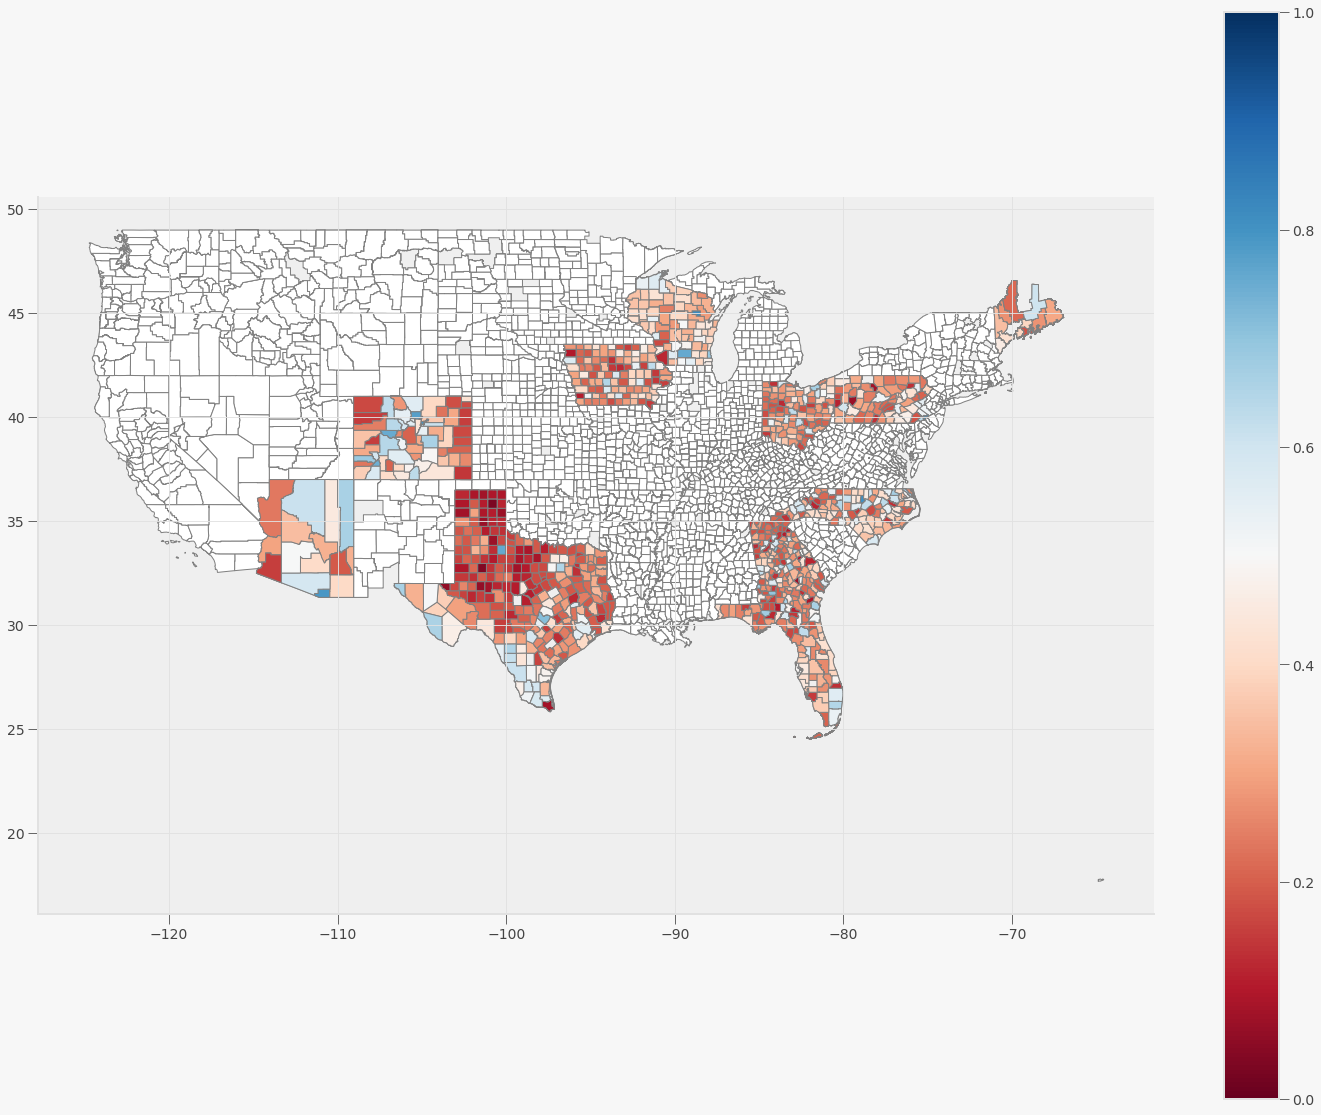

In [20]:
fig, gax = plt.subplots(figsize=(25,20))
countymainland.plot(ax=gax, edgecolor='grey',color='white')
geowithcountyswing.plot(
    ax=gax, edgecolor='grey', column='percentage20_Joe_Biden', legend=True, cmap='RdBu',
    vmin=0, vmax=1)

Graph gives a general view of the outcome of these swing states. A stacked plot with subplots on the county level nation-wide depicting relation between variables will not be presented due to limited visibility.

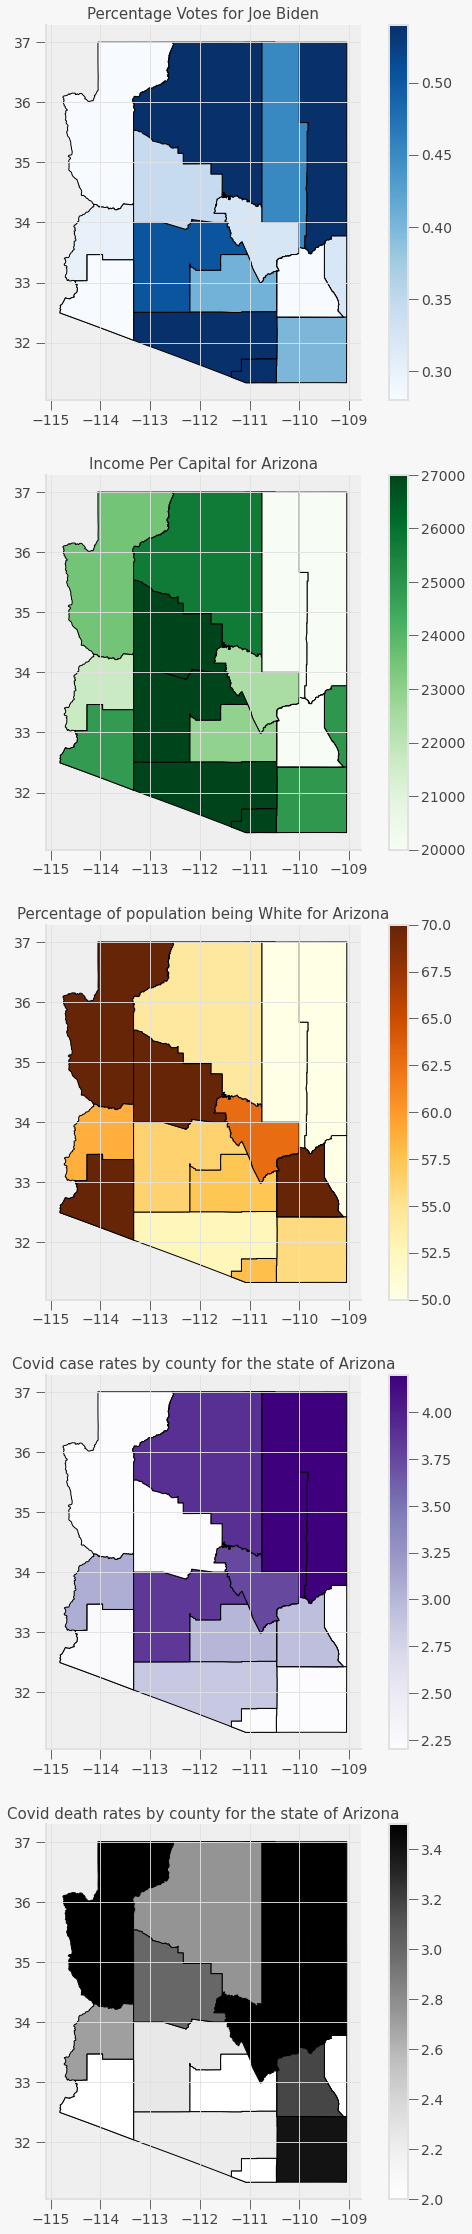

In [21]:
fig, gax = plt.subplots(5,1, figsize=(10, 40))

#county_df.query("NAME == 'Florida'").plot(ax=gax, edgecolor="black", color="white")
geowithcountyAR.plot(
    ax=gax[0], edgecolor='black', column='percentage20_Joe_Biden', legend=True, cmap='Blues',
    vmin=0.28, vmax=0.54)


geowithcountyAR.plot(
    ax=gax[1], edgecolor='black', column='IncomePerCap', legend=True, cmap='Greens',
    vmin=20000, vmax=27000)

geowithcountyAR.plot(
    ax=gax[2], edgecolor='black', column='White', legend=True, cmap='YlOrBr',
    vmin=50, vmax=70)

geowithcountyAR.plot(
    ax=gax[3], edgecolor='black', column='covidpct', legend=True, cmap='Purples',
    vmin=2.2, vmax=4.2)

geowithcountyAR.plot(
    ax=gax[4], edgecolor='black', column='deathpct', legend=True, cmap='Greys',
    vmin=2.0, vmax=3.5)
gax[0].set_title('Percentage Votes for Joe Biden', size = 15)
gax[1].set_title('Income Per Capital for Arizona', size =15 )
gax[2].set_title('Percentage of population being White for Arizona', size =15 )
gax[3].set_title('Covid case rates by county for the state of Arizona', size = 15)
gax[4].set_title('Covid death rates by county for the state of Arizona', size = 15)
plt.show()
#vmin and vmax values are quartile values from describe() functions


Arizona being one of the swing states, I present 5 graphs stacked on each other depicting levels of different variables.
First graph maps out percentage votes for Joe Biden, pairing up with the second, third, fourth, fifth graph, we can see:
The Income Per Capital graph is only weakly to moderately related to the outcomes graph, with many outlier, one of them being the right top county having low incomes but at the same time, low percentage votes for Biden. 
Ethnicity shows stronger correlation, **counties with higher percentage of population being white also possesses lower votes percentage for Biden.**
Both variables depicting covid-19 situations tells similar messages, counties that are lighter in color(some almost white)on the covid situation maps are also lighter in color on the outcome map, **meaning most counties with higher death and case rates voted more for Biden**, but there certainly exists outliers, thus lets look at one more state to be sure.

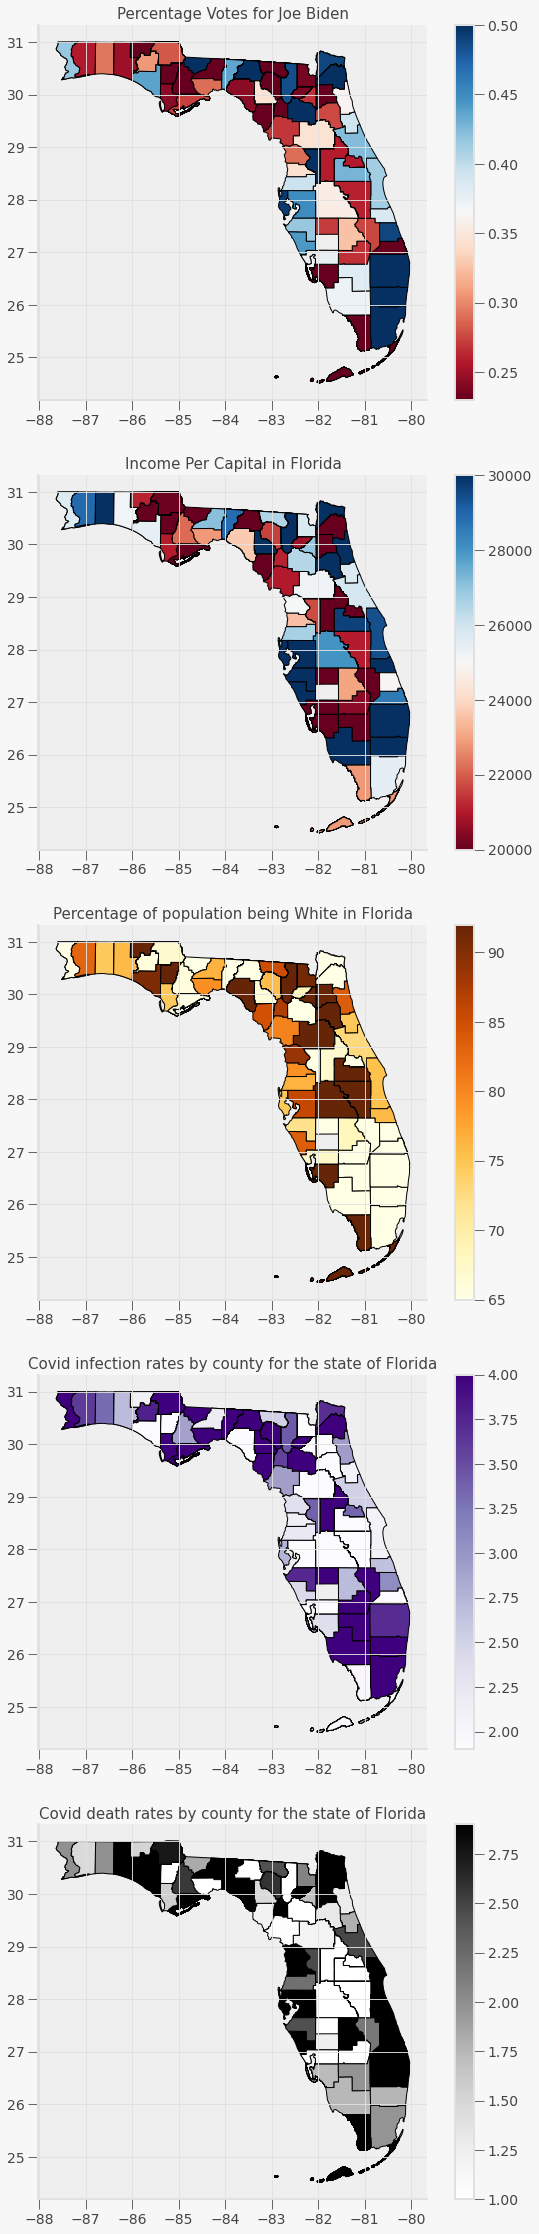

In [22]:
fig, gax = plt.subplots(5,1, figsize=(10, 40))

#state_gdf.query("NAME == 'Florida'").plot(ax=gax, edgecolor="black", color="white")
geowithcountyFL.plot(
    ax=gax[0], edgecolor='black', column='percentage20_Joe_Biden', legend=True, cmap='RdBu',
    vmin=0.23, vmax=0.5)


#state_gdf.query("NAME == 'Florida'").plot(ax=gax, edgecolor="black", color="white")
geowithcountyFL.plot(
    ax=gax[1], edgecolor='black', column='IncomePerCap', legend=True, cmap='RdBu',
    vmin=20000, vmax=30000)

geowithcountyFL.plot(
    ax=gax[3], edgecolor='black', column='covidpct', legend=True, cmap='Purples',
    vmin=1.9, vmax=4.0)

geowithcountyFL.plot(
    ax=gax[4], edgecolor='black', column='deathpct', legend=True, cmap='Greys',
    vmin=1, vmax=2.9)

geowithcountyFL.plot(
    ax=gax[2], edgecolor='black', column='White', legend=True, cmap='YlOrBr',
    vmin=65, vmax=92)


gax[0].set_title('Percentage Votes for Joe Biden', size = 15)
gax[1].set_title('Income Per Capital in Florida', size = 15)
gax[2].set_title('Percentage of population being White in Florida', size = 15)
gax[3].set_title('Covid infection rates by county for the state of Florida', size = 15)
gax[4].set_title('Covid death rates by county for the state of Florida', size = 15)

plt.show()

Here we take a different approach on the state of Florida(Another swing state), by setting the color schemes as identicals, we can see the similarity in graph one“percentage votes for Biden” and graph two"income per capital", counties with higher income per capital votes more for Biden, but again, with some counties being outliers that don't follow this pattern.
Covid situation shows only a small amount of correlation, the few counties on the eastern coastline shows higher death rates correlating with higher percentage votes for Biden, but there are quite a few outlier counties.

While we have mapped out election outcomes and the influencing factors for two states, below, I've plotted out such relation for the entire country based on county data.

In [23]:
state1 = state_gdf.merge(covfinal, left_on = "STUSPS", right_on = "state", how = "outer" )
state1.dropna(axis = 0 )

not_mainland = ['Alaska', 'Hawaii', "Puerto Rico","American Samoa","Guam","Commonwealth of the Northern Mariana Islands"]
mainlandgdf = state_gdf.query('NAME not in @not_mainland')
state1mainland = state1.query('NAME not in @not_mainland')

In [24]:
state1mainland.describe()
#quartile values from describe function are used to plot

ALAND        AWATER         cases       TotalPop      deaths  \
count  5.000000e+01  5.000000e+01     49.000000      49.000000   49.000000   
mean   1.530757e+11  8.600046e+09   4025.746880  152248.401611  131.544703   
std    1.227315e+11  1.574891e+10   4433.411888  165007.365013  201.541414   
min    1.583650e+08  1.863340e+07    185.181818   12940.815385    3.347826   
25%    8.311155e+10  1.540137e+09   1271.789474   49265.272727   17.467532   
50%    1.368479e+11  3.469367e+09   2286.795181   84945.609375   43.830000   
75%    2.044174e+11  8.179110e+09   4130.178218  183845.307692  104.764706   
max    6.766335e+11  1.040316e+11  17369.000000  672391.000000  778.761905   

        covidpct   deathpct  IncomePerCap  percentage20_Donald_Trump  \
count  49.000000  49.000000     49.000000                  49.000000   
mean    2.862549   2.437868  28099.048751                   0.492334   
std     1.133114   1.596924   5852.855036                   0.128761   
min     0.375887   0.511079  20127.743902                   0.039881   
25%     2.073883   1.370557  23335.000000                   0.418889   
50%     2.753198   2.084329  27326.801980                   0.492331   
75%     3.637990   2.798233  30045.354839                   0.585157   
max     6.042188   7.122744  50832.000000                   0.699362   

       percentage20_Joe_Biden    Poverty      White  total_votes20  \
count               49.000000  49.000000  49.000000   4.900000e+01   
mean                 0.487065  15.057273  76.729536   2.910128e+06   
std                  0.130226   3.917721  14.530813   3.224193e+06   
min                  0.265536   9.216667  36.000000   2.450900e+04   
25%                  0.391514  11.944444  68.111000   7.902530e+05   
50%                  0.494064  14.507955  80.933333   2.140985e+06   
75%                  0.556917  17.400000  88.253731   3.366867e+06   
max                  0.939701  24.941463  94.430909   1.609273e+07   

       votes20_Donald_Trump  votes20_Joe_Biden  votes16_Donald_Trump  \
count          4.900000e+01       4.900000e+01          4.900000e+01   
mean           1.403303e+06       1.455237e+06          1.200749e+06   
std            1.409240e+06       1.835682e+06          1.080580e+06   
min            1.506000e+03       1.235700e+04          1.155300e+04   
25%            3.685260e+05       2.869910e+05          4.071990e+05   
50%            1.020280e+06       8.434730e+05          9.479340e+05   
75%            1.690663e+06       1.783149e+06          1.535513e+06   
max            5.866019e+06       1.033914e+07          4.681590e+06   

       votes16_Hillary_Clinton  total_votes16  percentage16_Donald_Trump  \
count             4.900000e+01   4.900000e+01                  49.000000   
mean              1.190619e+06   2.513562e+06                   0.493879   
std               1.283354e+06   2.395890e+06                   0.117448   
min               5.594900e+04   2.487420e+05                   0.041221   
25%               2.663560e+05   7.189660e+05                   0.417839   
50%               8.391260e+05   1.923346e+06                   0.490640   
75%               1.382210e+06   2.916404e+06                   0.583375   
max               5.931283e+06   9.631972e+06                   0.700517   

       percentage16_Hillary_Clinton  
count                     49.000000  
mean                       0.447493  
std                        0.123580  
min                        0.224928  
25%                        0.359756  
50%                        0.466407  
75%                        0.516778  
max                        0.928466

Text(0.5, 1.0, 'Covid Death Rates By State')

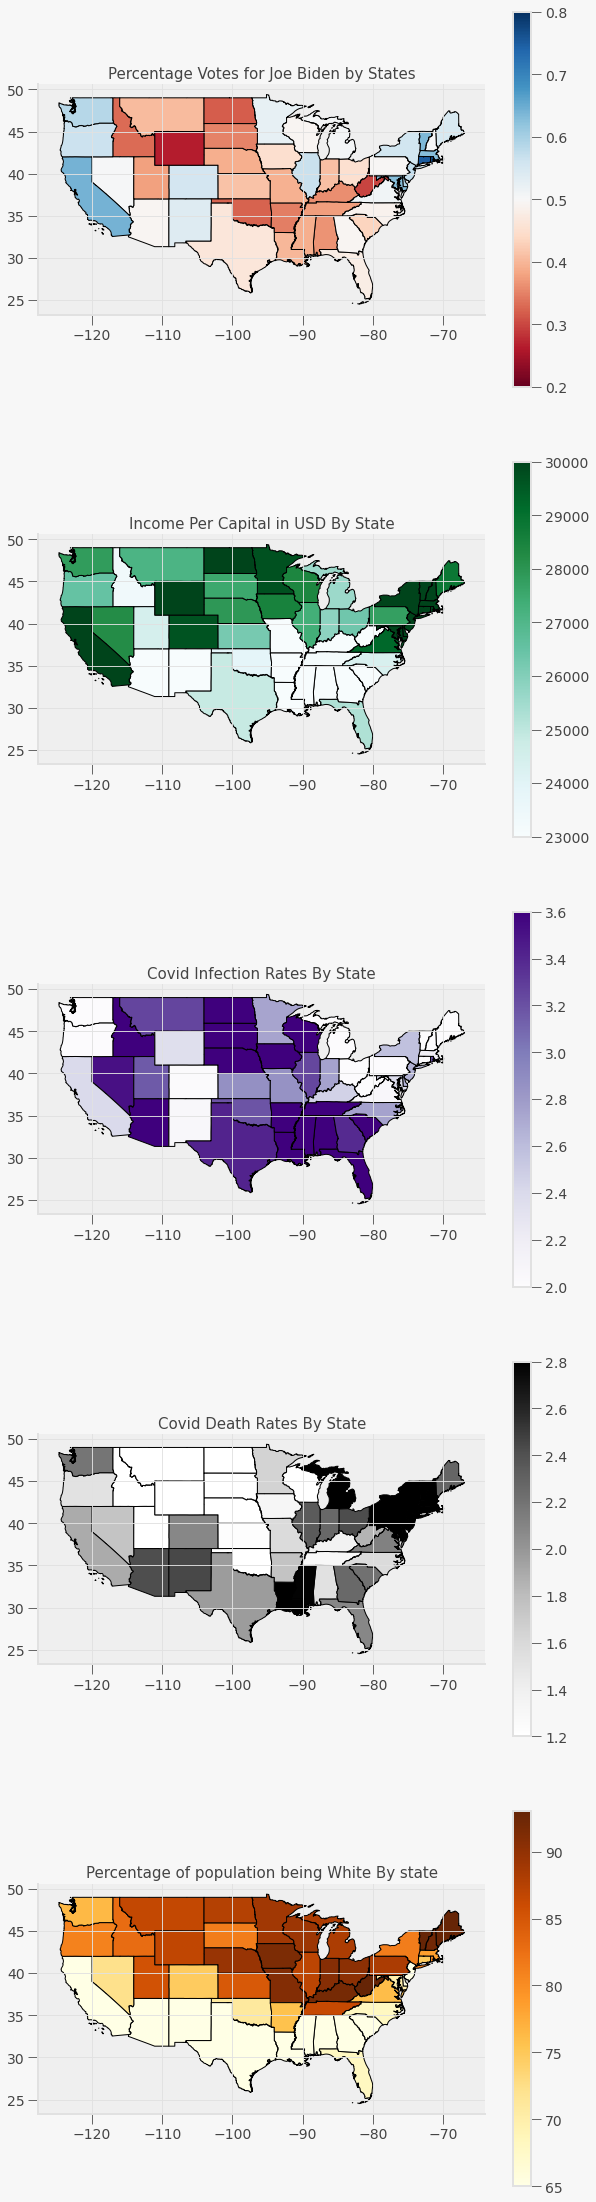

In [25]:
fig, gax = plt.subplots(5,1,figsize=(10,40))

#mainlandgdf.plot(ax=gax, edgecolor='black',color='white')
state1mainland.plot(
    ax=gax[1], edgecolor='black', column='IncomePerCap', legend=True, cmap='BuGn',
    vmin=23000, vmax=30000)

#mainlandgdf.plot(ax=gax, edgecolor='black',color='white')
state1mainland.plot(
    ax=gax[2], edgecolor='black', column='covidpct', legend=True, cmap='Purples',
    vmin=2, vmax=3.6)

state1mainland.plot(
    ax=gax[3], edgecolor='black', column='deathpct', legend=True, cmap='Greys',
    vmin=1.2, vmax=2.8)

state1mainland.plot(
    ax=gax[0], edgecolor='black', column='percentage20_Joe_Biden', legend=True, cmap='RdBu',
    vmin=0.2, vmax=0.8) 

state1mainland.plot(
    ax=gax[4], edgecolor='black', column='White', legend=True, cmap='YlOrBr',
    vmin=65, vmax=93)

gax[0].set_title('Percentage Votes for Joe Biden by States', size = 15)
gax[1].set_title('Income Per Capital in USD By State', size = 15)
gax[4].set_title('Percentage of population being White By state', size = 15)
gax[2].set_title('Covid Infection Rates By State', size = 15)
gax[3].set_title('Covid Death Rates By State', size = 15)
#all vertical bar are not labeled due to a bug in Python.

On a nation-wide scale, we can still observe the same pattern, this time with relatively less outliers.
We can see the darker green states with higher income per capital on graph 2 is relatively similar to the blue state of graph one, meaning a higher percentage votes for Biden, with Wyoming and a few other states being outliers.
We can also observe the relation between covid situations and election outcome, states with higher than average death rates states with lower infection rate all votes for Biden.
Ethnicity wise, there isn't a strong correlation between percentage of population being white and the results, contrary to the heatmap at the end of Section 1 or the scatterplot in section 1.

In [26]:
! pip install bokeh

In [27]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json

Loading BokehJS ...

In [28]:
wi_geojson=GeoJSONDataSource(geojson=state1mainland.to_json())


In [29]:
color_mapper = LinearColorMapper(palette = brewer['RdBu'][10], low = 0.1, high = 0.9)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('State','@NAME'),('Percentage Trump', '@percentage20_Donald_Trump'),
                               ('Percentage Biden','@percentage20_Joe_Biden'),
                               ('Income Per Capital','@IncomePerCap'),('Infection Rates', '@covidpct'),
                              ('Percentage Population White','@White'),('Death Rates', '@deathpct')])
p = figure(title="Presidential election result", y_range = (14,60), x_range = (-130,-65), tools=[hover])
p.patches("xs","ys",source=wi_geojson,
          fill_color = {'field' :'percentage20_Donald_Trump', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)

An interactive general map, colours showing election outcome, red means majority voted for Donald Trump, blue means majority voted for Joe Biden, if hovered over, depicts all the other variables.



#  Conclusion of Section 2 

Despite all showing some correlation in section 1, not all of the variables had shown strong correlation when plotted on a map.
Strength of correlation varies within state and even counties(as seen from Florida/Arizona example). 
Overall, the correlation still exists for most variables and for a majority of the states/counties,such relation can be used to analyze and potentially forecast but a conclusion of causation cannot be made.

# Section 3
My project focuses on two main influencing factors of the 2020 US election, covid-19 situations and demographics. 
<br />

The ideal website to scrape for data regarding covid-19 situations is twitter.By scraping for tweets with specific hastags that is pro-trump such as #maga/#trump2020/#covidhoax and such, and only including geo-tagged tweets of our interested counties/states. Tweets represents the opinion of the people and in someway represents the situation of the pandemic in that location. But the issue is that despite getting organized datasheets of infection rates and death rates, the actual situation varies by states and isn't easily quantifiable, the only feasible way is using the previously mentioned twitter.
<br /><br />
Even with such filters for tweets, there still might be thousands or millions of tweets, even if formed into dataframes, it would still be non-feasbile due to technical difficulties. I would need to learn how number of retweets, likes and reposts translates to severity of the covid-19 situation, how potentially millions of tweets can be analyzed simultaneously, and most importantly, which date should I scrape, or what is a feasible time gap between datas scraped. Scraping tweets in a time period also works, we can analyze how tweets at different times represent different opinions, and how those opinions translated into the election results. But I need to acquire more text analysis skills to do so.
<br /><br />
Demographics on the other hand is observible and easily quantified, one variable is Income Per capital, the corresponding website that I can scrape is https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income_. In previous sections, our demographic data are usually one time data from the 2016 US census, by scraping this website we gain access to change in income data over a period of time, we can see if a change in income of that individual state influenced the overall satisfaction of the current governing party, and observe whether that satisfaction influenced the election outcome in anyway possible when compared to previous election.<br />


<br /><br />
*2020 economic data is not available and not used due to the complicated economic situation of covid-19, in this section, we are isolating the income variable and not considering covid-19 influences.*
<br /><br /> Below, I will be scraping data from https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income

In [30]:
import requests

web_url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income"
response = requests.get(web_url)
import pandas as pd
from bs4 import BeautifulSoup

In [31]:
response.status_code

200

In [32]:
soup_obj = BeautifulSoup(response.content)
datatable = soup_obj.find_all('table', 'wikitable sortable')[0]
income_val = datatable.find_all('tr')

In [33]:
income_df = pd.DataFrame(columns = ['states','nine','eight','seven','six'])
#created a new dataframe called income_df, nine eight etc are for the years 2019,2018...,
#odd naming due to inability to name columns after integers.

In [34]:
ix = 0
for row in income_val[1:]:
    values = row.find_all('td') 
    states = values[1].text.strip()
    nine = int(values[2].text.strip().strip('$').replace(',',''))
    eight = int(values[3].text.strip().strip('$').replace(',',''))
    seven = int(values[2].text.strip().strip('$').replace(',',''))
    six = int(values[3].text.strip().strip('$').replace(',',''))
    
    
    income_df.loc[ix] = [states, nine, eight, seven, six] 
    ix += 1
    
#data for each year is scraped and cleaned 

In [35]:
income_df['Percentage change in income'] = (income_df['nine'] - income_df['six'])/income_df['six']*100
#while I scrapped for income data, what I'm interested in is the percentage change in income over the years.

In [36]:
incomediff_df = income_df.drop(['nine','eight','seven','six'],axis = 1)
#nine eight etc here is short for 2019, 2018 etc, can't name columns with int
incomediff_df.iat[1,0] = 'District of Columbia'
#cleaning data, some states have different names in the two dataset, and some have missing data

In [37]:
newstatedf = state1mainland.merge(incomediff_df, left_on = "NAME", right_on = "states", how = "inner" )
#newstatedf is my newly merged dataset with the change in income variable.
newstatedf.head()



STATEFP   STATENS     AFFGEOID GEOID STUSPS         NAME LSAD         ALAND  \
0      01  01779775  0400000US01    01     AL      Alabama   00  131173688951   
1      04  01779777  0400000US04    04     AZ      Arizona   00  294198560125   
2      08  01779779  0400000US08    08     CO     Colorado   00  268429343790   
3      09  01779780  0400000US09    09     CT  Connecticut   00   12542638347   
4      12  00294478  0400000US12    12     FL      Florida   00  138924199212   

        AWATER                                           geometry  ...  \
0   4593686489  MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...  ...   
1   1027346486  POLYGON ((-114.79968 32.59362, -114.80939 32.6...  ...   
2   1175112870  POLYGON ((-109.06025 38.59933, -109.05954 38.7...  ...   
3   1815476291  POLYGON ((-73.72777 41.10070, -73.69595 41.115...  ...   
4  31386038155  MULTIPOLYGON (((-80.75164 24.85725, -80.72906 ...  ...   

   total_votes20  votes20_Donald_Trump  votes20_Joe_Biden  \
0      2309900.0             1434159.0           843473.0   
1      3366867.0             1651812.0          1663447.0   
2      3216881.0             1347516.0          1783149.0   
3       142272.0               33714.0           106730.0   
4     11075446.0             5667474.0          5294767.0   

   votes16_Donald_Trump  votes16_Hillary_Clinton  total_votes16  \
0             1306925.0                 718084.0      2078165.0   
1             1021154.0                 936250.0      2062810.0   
2             1137455.0                1212209.0      2564185.0   
3              629419.0                 839126.0      1535140.0   
4             4605515.0                4485745.0      9386750.0   

   percentage16_Donald_Trump  percentage16_Hillary_Clinton       states  \
0                   0.628884                      0.345538      Alabama   
1                   0.495031                      0.453871      Arizona   
2                   0.443593                      0.472746     Colorado   
3                   0.410008                      0.546612  Connecticut   
4                   0.490640                      0.477881      Florida   

   Percentage change in income  
0                     3.756443  
1                     4.741248  
2                     7.190805  
3                     3.254833  
4                     6.788432  

[5 rows x 30 columns]

A newly merged dataframe, I kept the geometry columns and others for conveniences when graphing.

Text(0.5, 0, 'Percentage Change in Income from 2016-2019')

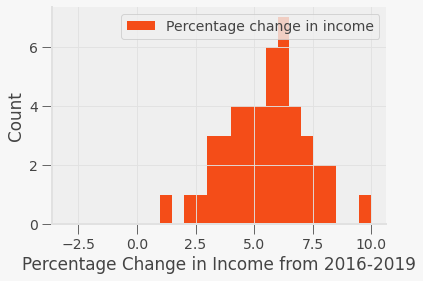

In [38]:
newstatedf.plot(
    kind="hist", y='Percentage change in income', color=(244/255, 77/255, 24/255),
    bins= [-3,0,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10], legend=True, density=False
)
plt.ylabel('Count')
plt.xlabel('Percentage Change in Income from 2016-2019')

We can see the majority of states possess a change in income of about 4-7%, with no decrease over the years.
**Please note that despited scraping for income of each year, the interested data here is the percentage change in income, thus its a histogram depicting %change in income.

In [39]:
newstatedf['pctchange trump']= (newstatedf['percentage20_Donald_Trump']-newstatedf['percentage16_Donald_Trump'])*100
#creates new variable depicting change in votes for trump.

Text(0.5, 1.0, '2016-2019 Percentage change in income')

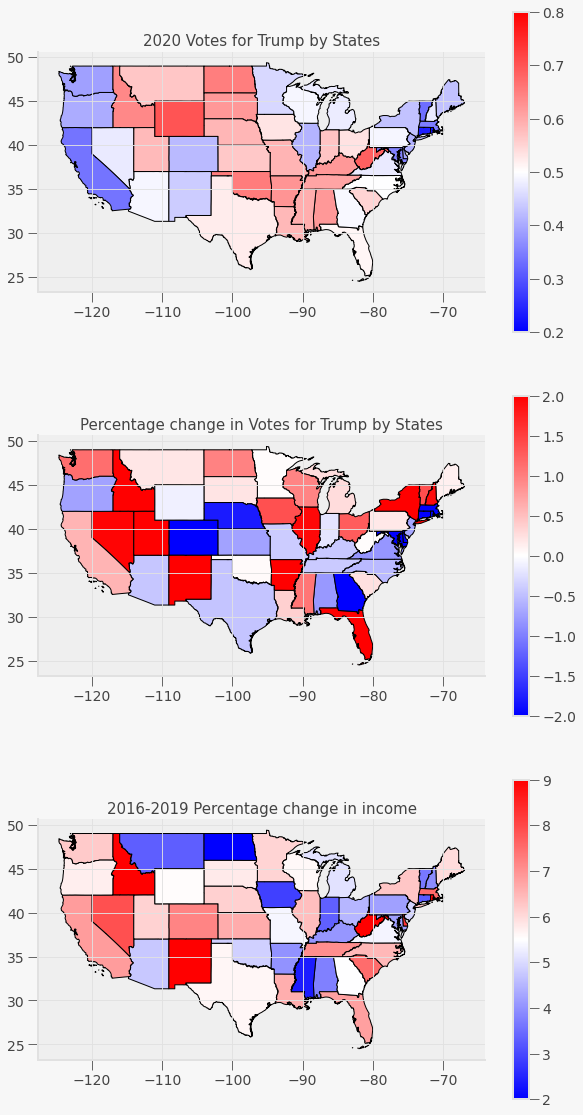

In [40]:
fig, gax = plt.subplots(3,1, figsize=(10, 20))

newstatedf.plot(ax=gax[0],
    edgecolor='black', column='percentage20_Donald_Trump', legend=True, cmap='bwr',
    vmin=0.2, vmax=0.8) 
newstatedf.plot(ax=gax[1],
    edgecolor='black', column='pctchange trump', legend=True, cmap= 'bwr',
    vmin=-2, vmax=2) 
newstatedf.plot(ax=gax[2],
    edgecolor='black', column='Percentage change in income', legend=True, cmap='bwr',
    vmin=2, vmax=9) 

gax[0].set_title('2020 Votes for Trump by States', size = 15)
gax[1].set_title('Percentage change in Votes for Trump by States', size = 15)
gax[2].set_title('2016-2019 Percentage change in income', size = 15)


In [41]:
newstatedf.describe()
#quartile data and mean is used as references to set max and mins when plotting

ALAND        AWATER         cases       TotalPop      deaths  \
count  4.900000e+01  4.900000e+01     49.000000      49.000000   49.000000   
mean   1.561926e+11  8.743920e+09   4025.746880  152248.401611  131.544703   
std    1.219875e+11  1.587888e+10   4433.411888  165007.365013  201.541414   
min    1.583650e+08  1.863340e+07    185.181818   12940.815385    3.347826   
25%    9.279055e+10  1.536767e+09   1271.789474   49265.272727   17.467532   
50%    1.389242e+11  3.541928e+09   2286.795181   84945.609375   43.830000   
75%    2.062323e+11  8.528606e+09   4130.178218  183845.307692  104.764706   
max    6.766335e+11  1.040316e+11  17369.000000  672391.000000  778.761905   

        covidpct   deathpct  IncomePerCap  percentage20_Donald_Trump  \
count  49.000000  49.000000     49.000000                  49.000000   
mean    2.862549   2.437868  28099.048751                   0.492334   
std     1.133114   1.596924   5852.855036                   0.128761   
min     0.375887   0.511079  20127.743902                   0.039881   
25%     2.073883   1.370557  23335.000000                   0.418889   
50%     2.753198   2.084329  27326.801980                   0.492331   
75%     3.637990   2.798233  30045.354839                   0.585157   
max     6.042188   7.122744  50832.000000                   0.699362   

       percentage20_Joe_Biden  ...  total_votes20  votes20_Donald_Trump  \
count               49.000000  ...   4.900000e+01          4.900000e+01   
mean                 0.487065  ...   2.910128e+06          1.403303e+06   
std                  0.130226  ...   3.224193e+06          1.409240e+06   
min                  0.265536  ...   2.450900e+04          1.506000e+03   
25%                  0.391514  ...   7.902530e+05          3.685260e+05   
50%                  0.494064  ...   2.140985e+06          1.020280e+06   
75%                  0.556917  ...   3.366867e+06          1.690663e+06   
max                  0.939701  ...   1.609273e+07          5.866019e+06   

       votes20_Joe_Biden  votes16_Donald_Trump  votes16_Hillary_Clinton  \
count       4.900000e+01          4.900000e+01             4.900000e+01   
mean        1.455237e+06          1.200749e+06             1.190619e+06   
std         1.835682e+06          1.080580e+06             1.283354e+06   
min         1.235700e+04          1.155300e+04             5.594900e+04   
25%         2.869910e+05          4.071990e+05             2.663560e+05   
50%         8.434730e+05          9.479340e+05             8.391260e+05   
75%         1.783149e+06          1.535513e+06             1.382210e+06   
max         1.033914e+07          4.681590e+06             5.931283e+06   

       total_votes16  percentage16_Donald_Trump  percentage16_Hillary_Clinton  \
count   4.900000e+01                  49.000000                     49.000000   
mean    2.513562e+06                   0.493879                      0.447493   
std     2.395890e+06                   0.117448                      0.123580   
min     2.487420e+05                   0.041221                      0.224928   
25%     7.189660e+05                   0.417839                      0.359756   
50%     1.923346e+06                   0.490640                      0.466407   
75%     2.916404e+06                   0.583375                      0.516778   
max     9.631972e+06                   0.700517                      0.928466   

       Percentage change in income  pctchange trump  
count                    49.000000        49.000000  
mean                      5.803539        -0.154493  
std                       2.056060         4.061291  
min                       1.159202       -17.303893  
25%                       4.199984        -0.691641  
50%                       5.726358         0.046089  
75%                       6.788432         1.137382  
max                      10.778511        11.483270  

[8 rows x 22 columns]

Although we can observe a few democratic states with large positive change in income, the trend is not applicable to all states,same can be said about republican states and negative change in income, and we observe not much relation between changes in votes and changes in income so we run a correlation test for further inspections.

In [42]:
print(newstatedf['IncomePerCap'].corr(newstatedf['percentage20_Donald_Trump']))
print(newstatedf['Percentage change in income'].corr(newstatedf['pctchange trump']))

-0.7554217587592554
-0.033443096966134324


From these results, we can observe a moderate negative correlation between percentage voted for trump and change in income, but only a weak to non-existent correlation between change in income and percentage change in a states' vote for Trump. <br /><br />

This weak to non-existent correlation can be used as evidence to turn down my initial hypothesis that the change in income during 2016-2019 represents voters' satisfaction towards the current governing party, this weak correlation means a change in income during Trump's period of presidency cannot be used as an estimate to predict a change in votes for that same candidate in the next election.

In [43]:
newstatedf['candidate'] = 'None'
i = 0
for value in newstatedf['percentage20_Donald_Trump']:
    if value> 0.5:
        newstatedf['candidate'][i]= 'Trump'
        i += 1
    elif value <0.5:
        
        newstatedf['candidate'][i] = 'Biden'
        i +=1

Text(0.5, 0.98, '')

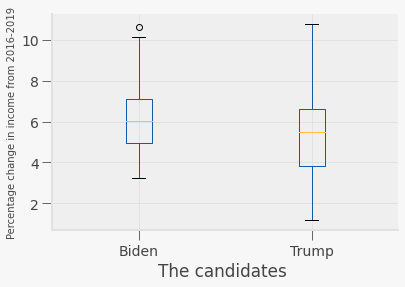

In [44]:
cstatedf = newstatedf.dropna()
cstatedf1 = cstatedf.drop(cstatedf.index[48],axis = 0)

boxbox = cstatedf1.boxplot(column = 'Percentage change in income', by='candidate', autorange = True)
plt.title("")
plt.ylabel("Percentage change in income from 2016-2019", size = 10)
plt.xlabel("The candidates ")
boxbox.get_figure().suptitle('')

I've sorted all states into two categories, those with majority who voted for Biden and for Trump. We can see from the boxplot that states with majority votes for Biden sees a slightly higher average change in income from 2016 to 2019, a correlation function can't be run due to categorical variables but we can conclude there is correlation. 

# Summary of section 3
Income of a state depicts strong correlation, and can be used to predict a states voting outcome and can be used only to some extend as one factor to predict a change in votes between elections for that specific states. Change in income without influences of the covid-19 situation is not a good predictor as it shows weak to no correlations. States who voted for Biden in 2020 had a higher increase in income during 2016-2019, this correlation can be used to predict future election, although a conclusion of causation is not reached. 
<br /><br />
In previous parts, we've visualized and presented how states and counties'income, covid-19 infection rate, death rate and racial diversity datas influence the election outcome.
<br /><br />
In section 3, by isolating the income factor of demographics(only using data up to 2019), we are able to depict the change in income's relation to both change in votes for a specific candidate and overall outcome of the election.


# Section 4 #
In section 1 we have identified some of the factors that influences the election, in section 2, we have plotted the variables out geographically,by comparing the different maps, we can observe that some of the variables depicts a relation while some are not as apparent, in section 3 we have introduced change in income from 2016-2019 as a new variable, with it being an extension of our initial variable of incomes via US Census.
<br /><br />
Past publications in both media and academia have come to similar conclusions as the results founded in section 1 and section 3,
that variables such as income and races plays a part in the election results, publications such as "Evidence from the 2020 election shows how to close the income voting divide" by Austin Clemens, Shanteal Lake and David Mitchell displayed how inequality on various levels(income being one) influenced the election (Clemens,Lakes,Mitchell,2021), they also proposed several plans on bridging these inequality in favor of a more true and representative election result, and "WHAT HAPPENED™ IN 2020", a publication via webpage with interactive visualizations, clearly depicts each election candidate's votes and their demographic variable's percentage(Ghitza,Robinson,2022). Other more academic paper such as "Income and Turnout: Is It True That Better off Regions Are Less Involved in Election Process?" looks into income and whether a state votes in the 2016 election using more mathematical approaches, which later could result in a change in election results(Chernichina,Kabeshova,Kochurova,Korteleva,Zlatnikovaa,2017).
<br /><br />
There are however, only a small amount of publications that analyzes these varibles in a relative manner, where the results are analyzed and related back to the election outcome and can be used, to some extend, predict whether a change in these variables might lead to change in voting outcomes in a particular states. That is however, my goal for this paper, in section 4, we will be implementing more mathematical methods such as OLS regression and Machine learning.




<br /><br /><br />

Citation APA
<br />
Clemens, A., Lakes, S., Mitchell, D. (2021, July 8). Evidence from the 2020 election shows how to close the Income Voting Divide. Equitable Growth. Retrieved April 12, 2022, from https://equitablegrowth.org/evidence-from-the-2020-election-shows-how-to-close-the-income-voting-divide/ 
Ghitza, Y., Robinson, J. (2022, March 23). What happened in 2020 national analysis. Catalist. Retrieved April 12, 2022, from https://catalist.us/wh-national/ 
Chernichina,A.K. , Kabeshova, P.V., Kochurova M.V., Korteleva E.I.,Zlatnikovaa M.A., (August 17, 2017). Income and Turnout: Is It True That Better off Regions Are Less Involved in Election Process?Retrieved April 12, 2022,, from https://ssrn.com/abstract=3020665 or http://dx.doi.org/10.2139/ssrn.3020665

In [45]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

First, we will be using OLS. Our independent variables, ranging from income per capital, covid infection/death rates and percentage of population being white, all present relation to the dependent variable, and we can observe from the scatter plot in section 1, especially income per capital, that dots look almost as if forming a straight line, I believe such relation can be explained as an X amount of increase in income relates to a Y amount of increase of votes percentage. 
<br /><br />


In [46]:
dfolss = cstatedf1[['NAME','covidpct','deathpct','IncomePerCap','percentage20_Donald_Trump','percentage20_Joe_Biden',
                    'White','votes16_Hillary_Clinton','percentage16_Donald_Trump','states', 'Percentage change in income',
                    'pctchange trump', 'candidate'
                   ]]
dfolss['const'] = 1.0
#dataframe on the state level, with added constant for OLS purposes.

dfolss['incomemin'] = dfolss['IncomePerCap']/10000
#income per cap is divided 10000 by for simplicity and easier interpretations.

dfolsc = countymainland[['state','county','percentage20_Donald_Trump','percentage20_Joe_Biden','White', 'Asian', 'Black',
                       'IncomePerCap', 'covidpct', 'Poverty','deathpct']]
dfolsc['const'] = 1.0
dfolsc['incomemin'] = dfolsc['IncomePerCap']/10000
#By county instead of state

Before OLS regressions is run, just like any other economic theories and practices, some assumptions have to be made, in our specific case:
<br /><br />
1:Future elections has only two major contending candidates, one from democratic party and one from republican party.
<br />
2:The previous president runs for the next election
<br />
3:No major political or economical events happens during the 4 year gap that is single-handedly advantageous to a single candidate in the election.(Such as watergate scandal, which helped Jimmy Carter in the elections)
<br />
4:People make decisions based on many things, one being the change during last party's governance, we assume the effect of such governance is fastly effective and is reflective on variables such as income/change in income, covid infection rates etc.
<br />
5:Voters are rational, blind idolization doesn't exists for election candidates.

While in real-life scenarios, its often more complicated, we are assuming these for the sake of modelling, the same variables that I've been using throughout section 1&2&3 will be used, the variables will be "Income Per capital" by state and by county, "percentage of population being White", "covid infection & death rates", each roughly representing a perspective(economy, demographic and covid-19 situation)of our interested state/county, all the variables shows high correlation as observed by the heatmap at the end of section 1.

In [54]:
reg1 = sm.OLS(endog=dfolss['percentage20_Donald_Trump'], exog=dfolss[['const', 'incomemin']], \
    missing='drop')
reg2 = sm.OLS(endog=dfolss['percentage20_Donald_Trump'], exog=dfolss[['const', 'White','incomemin','deathpct','covidpct']], \
    missing='drop')
reg3 = sm.OLS(endog=dfolsc['percentage20_Donald_Trump'], exog=dfolsc[['const', 'incomemin']], \
    missing='drop')
reg4 = sm.OLS(endog=dfolss['pctchange trump'], exog=dfolss[['const', 'deathpct']], \
    missing='drop')
results1 = reg1.fit()

print(results.summary())

#https://piazza.com/class/ky7v8mgzzwt672?cid=999

                                OLS Regression Results                               
Dep. Variable:     percentage20_Donald_Trump   R-squared:                       0.631
Model:                                   OLS   Adj. R-squared:                  0.623
Method:                        Least Squares   F-statistic:                     78.54
Date:                       Fri, 15 Apr 2022   Prob (F-statistic):           1.64e-11
Time:                               01:39:05   Log-Likelihood:                 55.543
No. Observations:                         48   AIC:                            -107.1
Df Residuals:                             46   BIC:                            -103.3
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Regression one is set up with income per capital divided by 10000 as the independent variable, and dependent variable is percentage voted for Trump, we observe an intercept of 0.9652 and a slope of -0.1702, when interpreted,for a state in the US, from a income per capital of 0, a unit increase(or 10000 USD) in income per capital results in a -17.02% change in percentages voted for Trump. This model also possess a moderate AIC and BIC when compared to the other. This model is ran because we want to calculate roughly the mathematical relation between these two variables, see how would income level of a state influences its voting patterns. **R-squared would be compared later.

In [48]:
results2 = reg2.fit()
print(results2.summary())

                                OLS Regression Results                               
Dep. Variable:     percentage20_Donald_Trump   R-squared:                       0.808
Model:                                   OLS   Adj. R-squared:                  0.790
Method:                        Least Squares   F-statistic:                     45.17
Date:                       Fri, 15 Apr 2022   Prob (F-statistic):           7.36e-15
Time:                               01:36:05   Log-Likelihood:                 71.214
No. Observations:                         48   AIC:                            -132.4
Df Residuals:                             43   BIC:                            -123.1
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Regression two is a multivariate OLS, with several independent variables:"income per capital", "percentage of population being white", "covid infection %death rate", the beta1/2/3s are all apparent from the coefficient column from the summary. Compared to model 1, it possesses a lower and better AIC/BIC.

In [49]:
results3 = reg3.fit()
print(results3.summary())

                                OLS Regression Results                               
Dep. Variable:     percentage20_Donald_Trump   R-squared:                       0.092
Model:                                   OLS   Adj. R-squared:                  0.092
Method:                        Least Squares   F-statistic:                     1492.
Date:                       Fri, 15 Apr 2022   Prob (F-statistic):          4.24e-311
Time:                               01:36:05   Log-Likelihood:                 8238.1
No. Observations:                      14755   AIC:                        -1.647e+04
Df Residuals:                          14753   BIC:                        -1.646e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Regression three is set up with income per capital divided by 10000 as the independent variable, and dependent variable is percentage voted for Trump. The difference with regression 1 is that we are using data on the county level, there are more data points.we observe an intercept of 0.8653 and a slope of -0.0787, when interpreted,for a county in the US, from a income per capital of 0, a unit increase(or 10000 USD) in income per capital results in a -7.87% change in percentages voted for Trump.
Because the measures are different for this model and other models, the AIC/BIC aren't really comparable.

In [50]:
results4 = reg4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:        pctchange trump   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     7.222
Date:                Fri, 15 Apr 2022   Prob (F-statistic):            0.00999
Time:                        01:36:06   Log-Likelihood:                -131.88
No. Observations:                  48   AIC:                             267.8
Df Residuals:                      46   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2001      1.038      2.119      0.0

Regression 4 again focuses on data at the county level, but this time we are using death rates of covid, a variable with the third highest correlation shown by the heatmap at the end of section 1, a 1% increase in death rates results in a 95% decrease in votes for Trump.


In [55]:


mean_income = np.mean(dfolss['incomemin'])

results1.predict(exog=[1, mean_income])


array([0.48802057])

Output via linear regression 1 is roughly the same as our actual calculated value, from OLS, on average, 48.8% of votes in states are for Trump, from the describe() below, we also observe a 48.9%, small amount of 0.1% error is observed.

In [56]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[results1,results2,results3,results4],
                            float_format='%0.5f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'White','incomemin','deathpct','covidpct',
                                             ])
print(results_table)


                   Model 1     Model 2     Model 3     Model 4  
----------------------------------------------------------------
const            0.96532***  0.57169***  0.86532***  2.20008**  
                 (0.05501)   (0.07654)   (0.00531)   (1.03830)  
White                        0.00280***                         
                             (0.00061)                          
incomemin        -0.17019*** -0.15083*** -0.07866***            
                 (0.01920)   (0.01752)   (0.00204)              
deathpct                     0.00311                 -0.95091***
                             (0.00696)               (0.35384)  
covidpct                     0.04087***                         
                             (0.00824)                          
R-squared        0.63065     0.80775     0.09187     0.13570    
R-squared Adj.   0.62262     0.78987     0.09180     0.11691    
R-squared        0.63        0.81        0.09        0.14       
No. observations 48     

We can see that the multivariate model 2 has the highest R-squared value of 0.81, meaning more data points on the plot can be explained using this model, model 1 has a second highest R-squared of over 0.63, while model 3, income on a county level only has a R-squared of 0.09, and model 4, where we used the death rate variable, has a R-squared of 0.1357. Its obvious that model 2 can best explain our data.

# Machine Learning


In [57]:
from sklearn import tree


We will be running a regression with the same variables as our previous OLS model 2, which composes of a more complicated set of variables, very much suitable for identification and categorization purposes such as a regression tree.

In [58]:
dfvar = dfolss[['incomemin','White','deathpct','covidpct']]
X = dfvar
dfpct = dfolss['percentage20_Donald_Trump']
y= dfpct
pct_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)

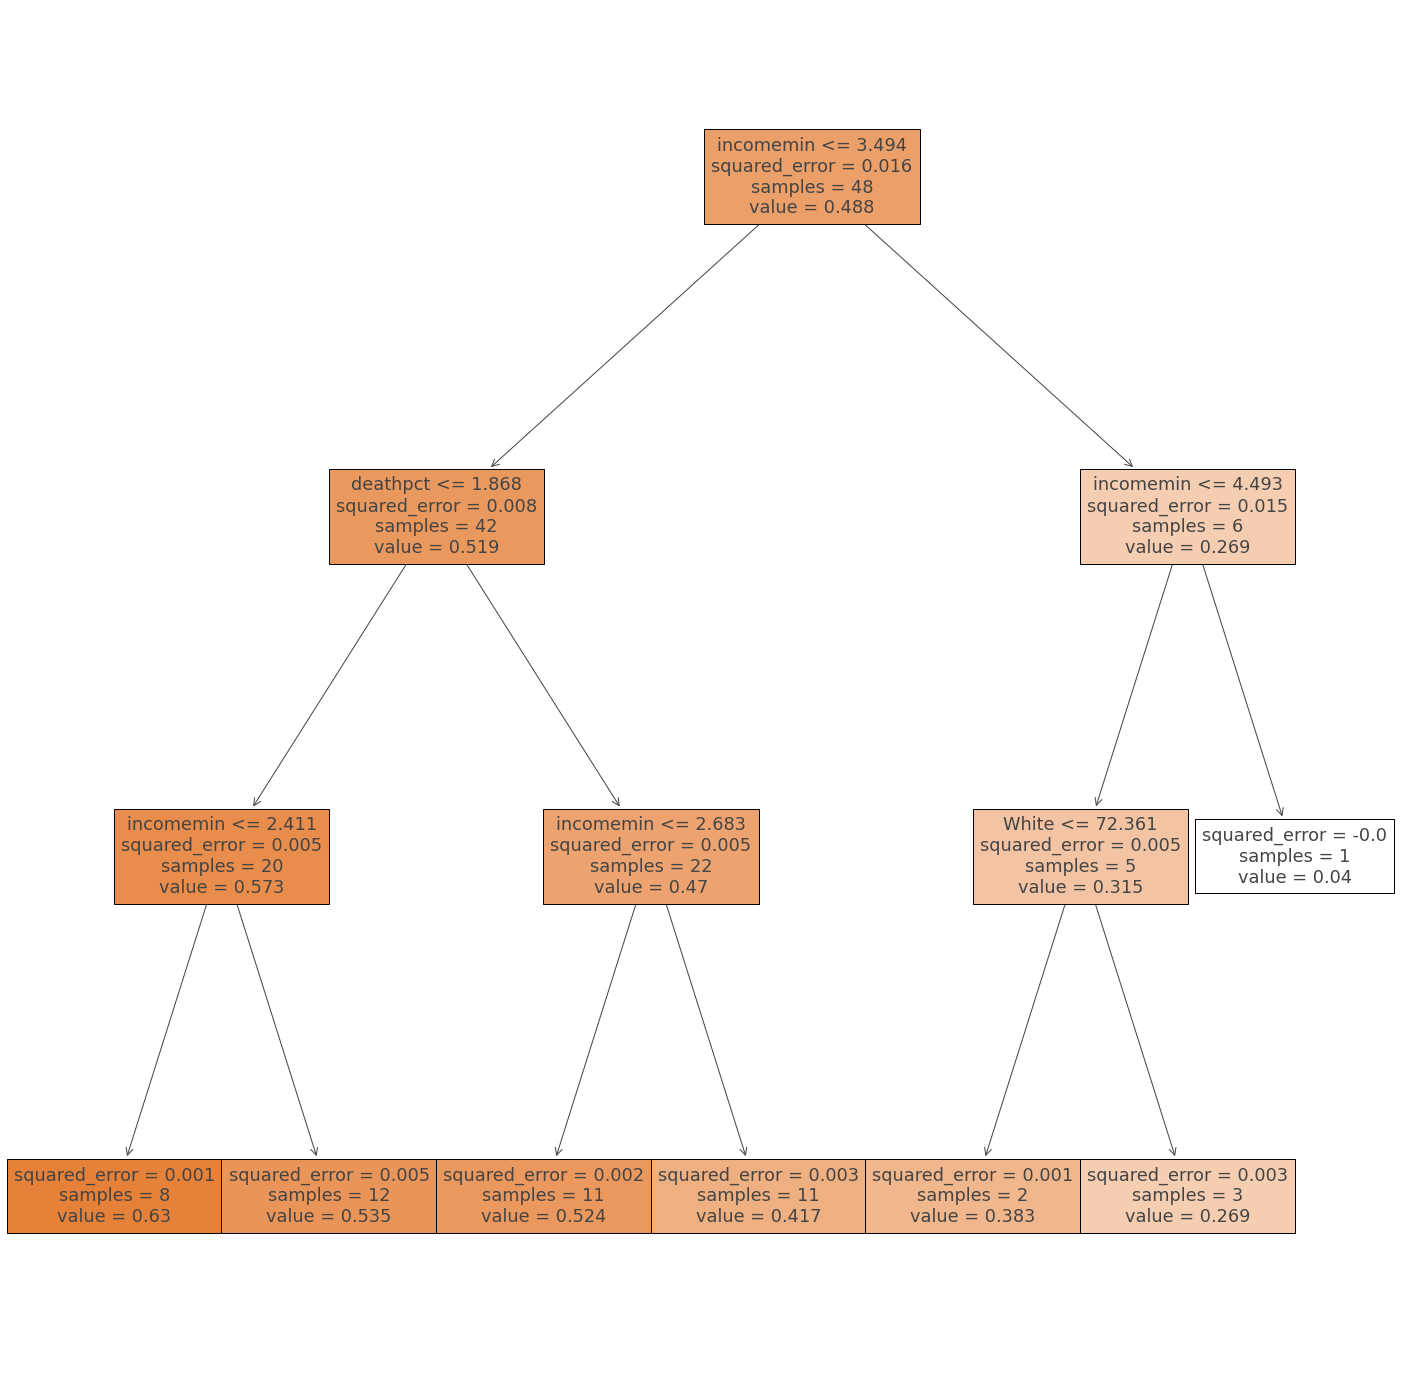

In [59]:
pctfig = plt.figure(figsize=(25,25))
pctfig = tree.plot_tree(pct_tree, feature_names=X.columns, filled=True)

How does our regression tree's result compare with our multivariate OLS?
Take the state of Florida for example, 

In [60]:
dfolss['predict_p'] = 0.5717 +0.0028*dfolss['White'] - 0.1508*dfolss['incomemin'] + 0.0031*dfolss['deathpct'] +0.0409*dfolss['covidpct']
dfolss.loc[dfolss['NAME'] == 'Florida']

NAME  covidpct  deathpct  IncomePerCap  percentage20_Donald_Trump  \
4  Florida  3.972134  2.084329  25265.970149                   0.511715   

   percentage20_Joe_Biden      White  votes16_Hillary_Clinton  \
4                0.478064  68.120896                4485745.0   

   percentage16_Donald_Trump   states  Percentage change in income  \
4                    0.49064  Florida                     6.788432   

   pctchange trump candidate  const  incomemin  predict_p  
4          2.10752     Trump    1.0   2.526597   0.550349

We can see from the above data that for the state of Florida, our OLS model 2 predicted value is 0.5503, while following our regression 
tree, the path is left-right-left, we arrives at the node that has a value of 0.524, while our actual calculated value sits around 0.511. For this specific state, the predicted value via regression is slightly different than the actual value. Below we calculate the MSE for this tree and OLS model 2.

In [61]:
from sklearn import (
    linear_model, metrics, pipeline, model_selection
)

lr_model = linear_model.LinearRegression()
lr_model.fit(X, y)
ytreepred = pct_tree.predict(X)
ylinearpred = lr_model.predict(X)


print('Mean Squared Error Tree:', metrics.mean_squared_error(y, ytreepred))
full_mse = metrics.mean_squared_error(y, ylinearpred)
print('Mean Squared Error OLS model 2:', full_mse)

Mean Squared Error Tree: 0.002644615686245404
Mean Squared Error OLS model 2: 0.003012105278155659


Both models have the same independent variables :"income per capital","percentage of population being white","covid infection rate", "covid death rate" have relatively low MSE, with the regression tree possessing a slightly lower MSE. If we compare only the MSE, regression tree seems like a better choice, but only by a small amount, however when taken closer looks, its quite the contrary.
<br /><br />
Here a regularization parameter is the tree depth, I've experimented with various other depths, a depth of 2 renders the tree practically useless and a depth of 4 makes the tree quite complicated, there are more nodes than necessary and makes the interpretation process quite diffcult.
<br /><br />
    Regression tree catergorizes the 50 states(48 states in our case due to missing data) into 7 categories, depicted by the 7 nodes, with each nodes possessing only a set value representing percentage voted for the Republican Party(instead of Donald Trump), each value is arbitrary, meaning the 58 states would only have 7 individual vote percentages which is very impossible. Thus for categorization and identification matters, the regression tree is useful, but if we want to estimate a percentage, the OLS is much better. 


In [62]:
np.mean(np.absolute(dfolss['predict_p']-dfolss['percentage20_Donald_Trump']))

0.0401009231436903

On average, our OLS2 model prediction is 4% off from the actual value.

Our Objective function is min[$\sum$ (yi - yR1)^2+ $\sum$ (yi-yR2)^2], where yi is the predicted value and yR1/2, correponds to different brnach of th tree, my objective here is to minimize the sum of the difference between the actual value(in our case the actual percentage voted for Trump) and the predicted value by that specific branch of the regression tree, yR here is not limited to R1/R2, its repeated for the entire tree so that it covers all the regions with all the variables such as income per capita, covid death rate, etc.

## Conclusion ##
Future steps:
<br /><br />
A important thing for future projects is time-aspect, more time-series data should be introduced when modelling for a more precise estimate, further more, future models could be build upon this one, with time series data as inputs for a more precise estimate.
<br /><br />
Another important future step is to run causal analysis to determine causality between the variables, by further identifying variables’ relation to the outcome, we can perfect our model for better estimates when we are sure there is causation involved.
<br /><br />


We’ve successfully identified and proved that there exists relation between income per capita, ethnicity and covid-19 situations with election outcomes, we’ve also provided visualizations for independent variables on certain county and on nation wide scale, we’ve also created two mathematical models, one OLS multivariate model(Regression/model 2) that can predict a votes percentage for the republican party and a regression tree model that can categorize states by their predicted votes percentage. Instead of a report and analysis of the influencing factor, this paper has made an preliminary attempt to mathematically model the variables in such a way that the models can be used in a predictive manner, I hope more can come in the future.